# Import

## Library 

In [486]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, rand_score
# PCA
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing


# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Model
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm

#Time
import time

##  Dataset

In [487]:
iris = pd.read_csv( 'iris.data' , names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'] )

In [488]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [489]:
iris.shape

(150, 5)

In [490]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Pre-processing

## Define Feature and Target

In [491]:
x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [492]:
y = iris[['Species']]
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Auto-Scaling

In [493]:
# Realizamos un autoscaling con los datos, para todas las features
scaler = StandardScaler().fit(x)
xscal = scaler.transform(x)

# Principal Component Analysis

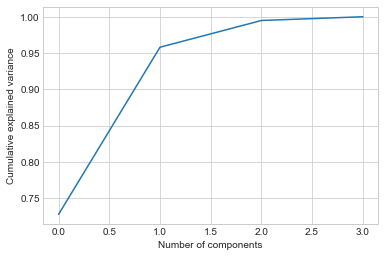

In [494]:
%matplotlib inline
pca = PCA(n_components=4)
pca.fit(xscal)
xpca = pca.transform(xscal)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

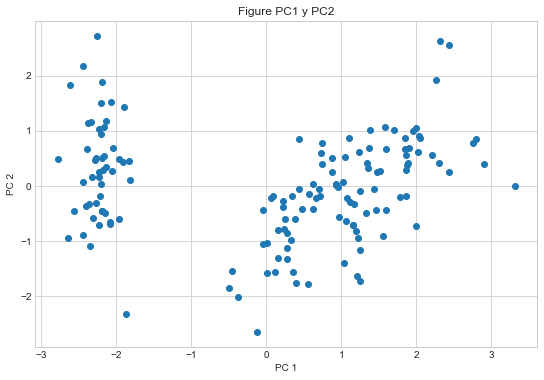

In [495]:
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1])    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Figure PC1 y PC2')
plt.show()

# Cluster analysis

## K - Means without PCA

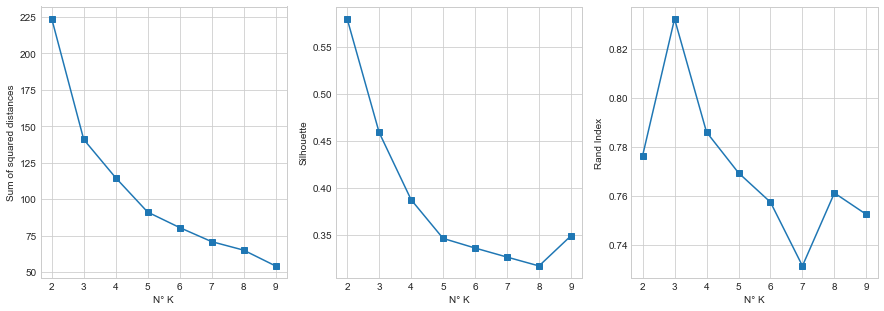

In [496]:
dist_cent = []
sil_list = []
rand_list = []
for k in range(2, 10):
    # Creamos el objecto de cluster y lo fiteamos en la misma linea utilizado xscal
    kmeans = KMeans(n_clusters=k, random_state=1).fit(xscal)
    centers_i = kmeans.cluster_centers_ # Centroide de cada cluster
    labels_i = kmeans.labels_ # Labels de cada muestra    
    # Silhouttte Score
    sil_score_i = silhouette_score(xscal,labels_i)
    sil_list.append(sil_score_i)        
    # Rand_Index
    rand_index_i = rand_score(y,labels_i)
    rand_list.append(rand_index_i)
    dist_cent.append(kmeans.inertia_)    
# Plot de metricas
fig, axs = plt.subplots(1,3,figsize=(15,5))    
axs[0].plot(range(2, 10), dist_cent, marker='s');
axs[0].set_xlabel('N° K')
axs[0].set_ylabel('Sum of squared distances')
# Silhoute plot
axs[1].plot(range(2, 10), sil_list, marker='s');
axs[1].set_xlabel('N° K')
axs[1].set_ylabel('Silhouette')
# Rand Index plot
axs[2].plot(range(2, 10), rand_list, marker='s');
axs[2].set_xlabel('N° K')
axs[2].set_ylabel('Rand Index')    
plt.show()


In [497]:
# Vamos a crear un dataframe para guardar los resultados
results_df = pd.DataFrame(columns=['Cluster','Rand_','Sil_'])

### Train KMeans with 2 clusters

In [498]:
kmeans2 = KMeans(n_clusters = 2, random_state = 10).fit(xscal)
# Silhouttte Score
sil_score = silhouette_score(xscal,kmeans2.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans2.labels_)

#Save outcome
results_df = results_df.append({'Cluster':'Kmeans2 without pca',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)
results_df

,Cluster,Rand_,Sil_
0,Kmeans2 without pca,0.776286,0.580184


### Train KMeans with 3 clusters

In [499]:
kmeans3 = KMeans(n_clusters = 3, random_state = 10).fit(xscal)
# Silhouttte Score
sil_score = silhouette_score(xscal,kmeans3.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans3.labels_)

#Save outcome
results_df = results_df.append({'Cluster':'Kmeans3 without pca',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)
results_df

,Cluster,Rand_,Sil_
0,Kmeans2 without pca,0.776286,0.580184
1,Kmeans3 without pca,0.819597,0.462149


## K - Means with  PCA

### 2 PC

In [500]:
reduced_dim = 2
xpca_rd = xpca[:,0:reduced_dim]

In [501]:
# Generamos el modelo PCA + K-means
kmeans_rd = KMeans(n_clusters=3,random_state=10).fit(xpca_rd)

In [502]:
# visualizamos los centroides finales de cada cluster
centers_rd = kmeans_rd.cluster_centers_
centers_rd

array([[-2.22730524,  0.3456925 ],
       [ 0.41801367, -0.94356957],
       [ 1.63471505,  0.48118669]])

#### Scatter plot con 2 PC:

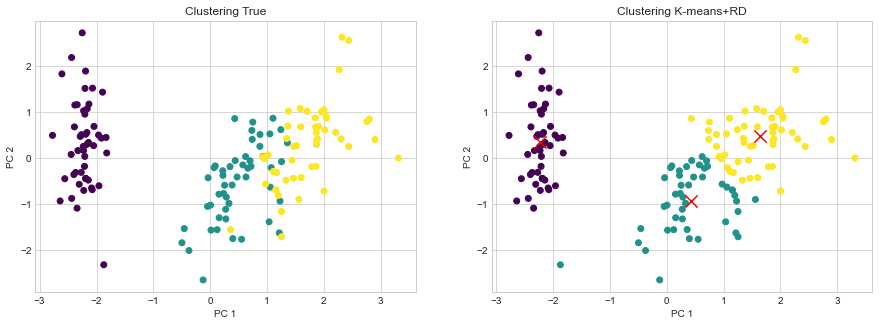

In [503]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
#Verdadero
axs[0].scatter(xpca[:,0],xpca[:,1],c=y,cmap='viridis')    
axs[0].set_xlabel('PC 1')
axs[0].set_ylabel('PC 2')
axs[0].set_title('Clustering True')
# PCA + K-Means
axs[1].scatter(xpca_rd[:,0],xpca_rd[:,1],c=kmeans_rd.labels_.astype(float),cmap='viridis')
axs[1].scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
axs[1].set_xlabel('PC 1')
axs[1].set_ylabel('PC 2')
axs[1].set_title('Clustering K-means+RD')
plt.show()

#### Metrics

In [504]:
# Silhouttte Score
sil_score = silhouette_score(xpca_rd,kmeans_rd.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans_rd.labels_)

#Guardamos los resultados
results_df = results_df.append({'Cluster':'2 PC + Kmeans',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)
results_df

,Cluster,Rand_,Sil_
0,Kmeans2 without pca,0.776286,0.580184
1,Kmeans3 without pca,0.819597,0.462149
2,2 PC + Kmeans,0.843132,0.503895


### 3 PC

In [505]:
# Cantidad de PC quer queremos
reduced_dim = 3
xpca_rd = xpca[:,0:reduced_dim]
# Generamos el modelo PCA + K-means 
kmeans_rd = KMeans(n_clusters=3, 
                   random_state=10).fit(xpca_rd)
centers_rd = kmeans_rd.cluster_centers_
centers_rd


array([[-2.22019328,  0.29222482, -0.04395511],
       [ 1.70578273,  0.58803896, -0.02280596],
       [ 0.56023256, -0.8237906 ,  0.06331619]])

#### Scatter plot con 3 PC:

<IPython.core.display.Javascript object>


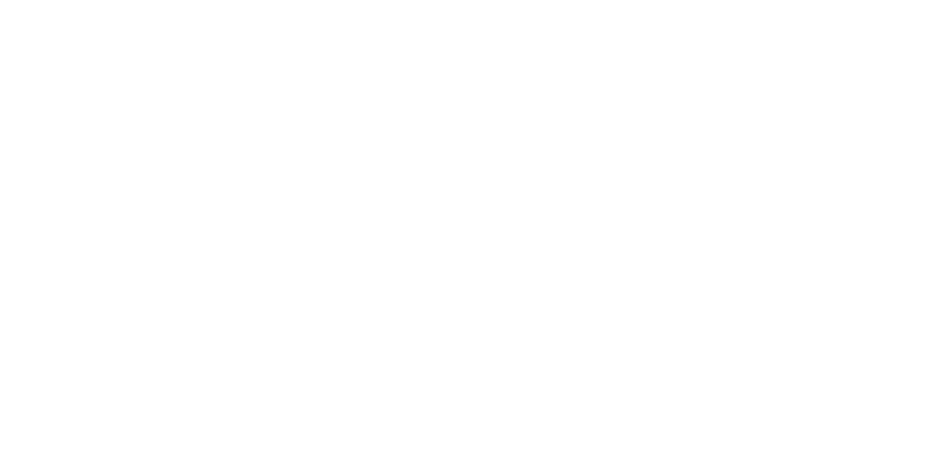

In [506]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xpca[:,0], xpca[:,1],xpca[:,3], c=kmeans_rd.labels_,cmap='viridis')
ax.scatter3D(centers_rd[:,0], centers_rd[:,1],centers_rd[:,2], marker="o", color='b',s=150)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

#### Metrics

In [507]:
# Silhouttte Score
sil_score = silhouette_score(xpca_rd,kmeans_rd.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans_rd.labels_)

#Guardamos los resultados
results_df = results_df.append({'Cluster':'3 PC + Kmeans',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)
results_df

,Cluster,Rand_,Sil_
0,Kmeans2 without pca,0.776286,0.580184
1,Kmeans3 without pca,0.819597,0.462149
2,2 PC + Kmeans,0.843132,0.503895
3,3 PC + Kmeans,0.82783,0.464523


## Clustering Jerárquico

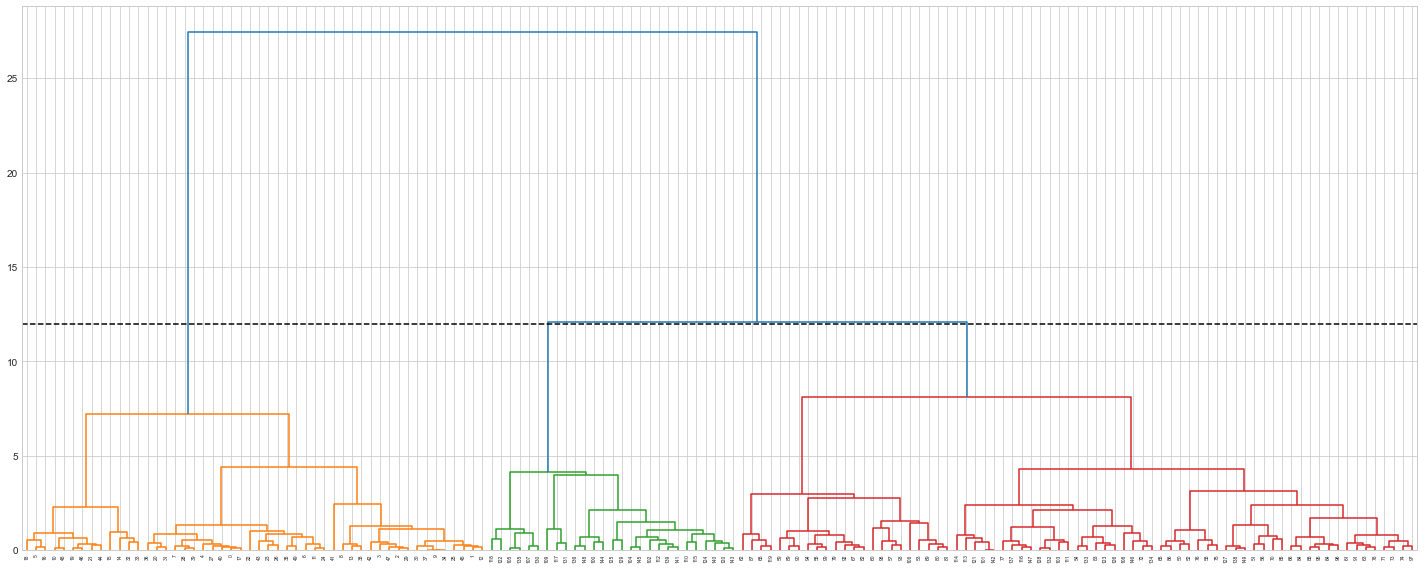

In [508]:
%matplotlib inline

# 3 PC
reduced_dim = 3
xpca_rd = xpca[:,0:reduced_dim]

# Definimos el linkage
Z = linkage(xpca_rd, method = 'ward',metric='euclidean')
# Threshold (Similaridad)
dist_cluster = 12
plt.figure(figsize=(25, 10))
dendrogram(Z,color_threshold=dist_cluster)
plt.axhline(c='k',linestyle='--', y=dist_cluster)
plt.show()

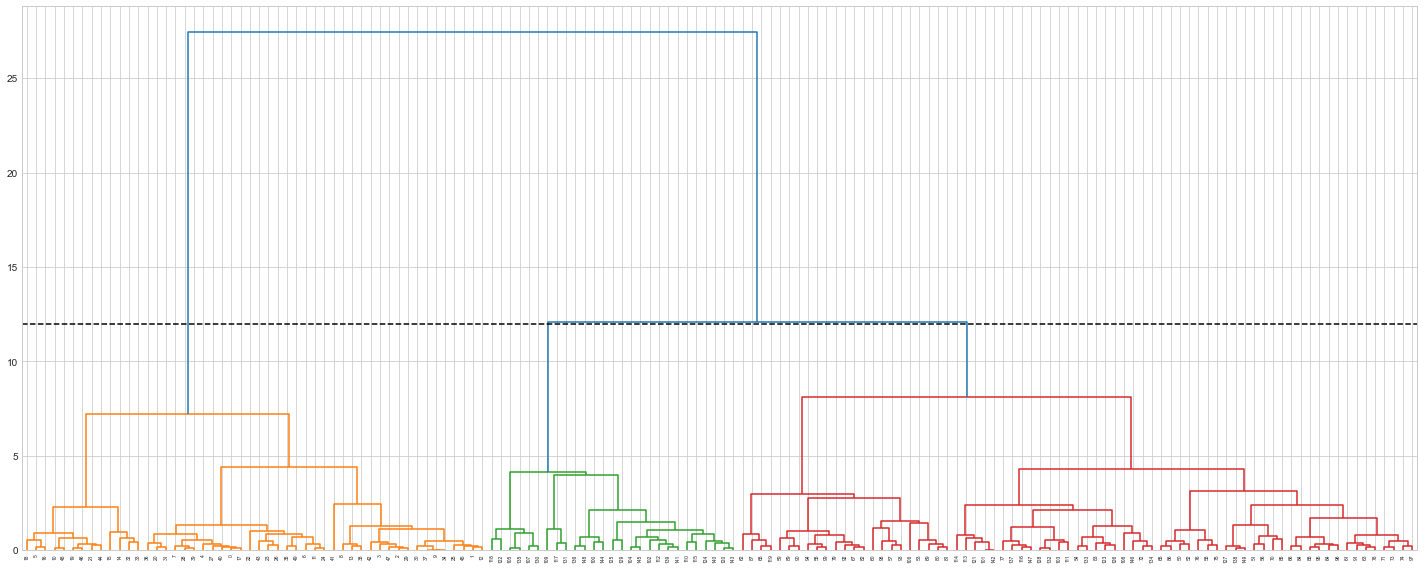

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0], dtype=int64)

In [509]:
%matplotlib inline

dist_cluster = 12
plt.figure(figsize=(25, 10))
dendrogram(Z,color_threshold=dist_cluster)
plt.axhline(c='k',linestyle='--', y=dist_cluster)
plt.show()

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold =dist_cluster,
                                  affinity='euclidean',
                                  linkage='ward')
cluster.fit_predict(xpca_rd)

<IPython.core.display.Javascript object>


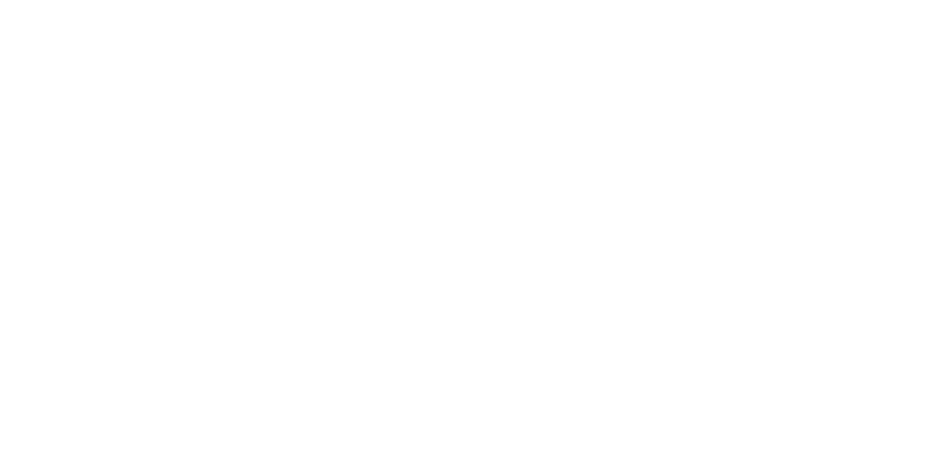

In [510]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xpca[:,0], xpca[:,1],xpca[:,3], c=cluster.labels_,cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

### Metrics

In [511]:
sil_score = silhouette_score(xpca_rd,cluster.labels_)
# Rand_Index
rand_index = rand_score(y,cluster.labels_)

#Guardamos los resultados
results_df = results_df.append({'Cluster':str( reduced_dim) +  ' PC + Hierarchy ',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)


## Outcome

In [512]:
results_df.sort_values('Rand_',ascending=False)

,Cluster,Rand_,Sil_
2,2 PC + Kmeans,0.843132,0.503895
4,3 PC + Hierarchy,0.841521,0.463188
3,3 PC + Kmeans,0.82783,0.464523
1,Kmeans3 without pca,0.819597,0.462149
0,Kmeans2 without pca,0.776286,0.580184


# Classification Analysis

## Classification without PCA

### Scaler

In [513]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [514]:
#Metrics of Performance
performance_df =  pd.DataFrame(columns=['Model','Best_score'])
performance_df

,Model,Best_score


### KNN

In [515]:
model_knn = KNeighborsClassifier()

parameters = { 'n_neighbors' : list(range(1, 50)) }

knn = GridSearchCV(model_knn, # modelo
                   param_grid = parameters, # Hyperparametros
                   refit = True, # retur best Parametrs 
                   scoring='accuracy',
                   cv = 5, # Count folds 
                   verbose=1) #Information about training 

knn.fit( X_train_scal, y_train ) 

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=1)

#### Best Score

In [516]:
print(f'KNN best score : {knn.best_score_}')
performance_df = performance_df.append({'Model':'KNN','Best_score':knn.best_score_},ignore_index=True)
performance_df

KNN best score : 0.9523809523809523


,Model,Best_score
0,KNN,0.952381


### Logistic Regression

In [517]:
%%time
log_reg = LogisticRegression(random_state=4, solver='lbfgs')

parameters = [{'penalty':['l1','l2','elasticnet','none']}, 
              {'C':[1,2,3,4,5,6,7,8,9, 10,11,12,13,14, 100, 1000]}]

log = GridSearchCV(estimator = log_reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

log.fit(X_train_scal, y_train)

CPU times: total: 906 ms
Wall time: 915 ms


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=4),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet', 'none']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                100, 1000]}],
             scoring='accuracy')

#### Best Score

In [518]:
print(f'Logistic Regression best score : {log.best_score_}')
performance_df = performance_df.append({'Model':'LR','Best_score':log.best_score_},ignore_index=True)
performance_df

Logistic Regression best score : 0.9714285714285715


,Model,Best_score
0,KNN,0.952381
1,LR,0.971429


### SVM

In [519]:
model_svc = svm.SVC(probability=True)

parameters = {'kernel':('linear', 'rbf'),
              'C':[1, 10, 100, 1000],
              'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}

svm_model = GridSearchCV(model_svc, # modelo
                   param_grid = parameters, # Hyperparametros
                   refit = True, # retur best Parametrs 
                   cv = 5, # Count folds 
                   verbose=1) #Information about training 

svm_model.fit( X_train_scal, y_train )

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             verbose=1)

#### best_score

In [520]:
print(f'SVM best score : {svm_model.best_score_}')
performance_df = performance_df.append({'Model':'SVM','Best_score':svm_model.best_score_},ignore_index=True)
performance_df

SVM best score : 0.9619047619047618


,Model,Best_score
0,KNN,0.952381
1,LR,0.971429
2,SVM,0.961905


### Decision Trees Model

In [521]:
# #Define model
tree_clf = DecisionTreeClassifier()

tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

#Define GridserchCV
tree = GridSearchCV(tree_clf,                    # model
                   param_grid = tree_para,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10,
                   refit = True)                     # number of folds

# Training Model
tree.fit( X_train_scal , y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='accuracy')

#### best_score

In [522]:
print(f'Decision Trees best score : {tree.best_score_}')
performance_df = performance_df.append({'Model':'DT','Best_score':tree.best_score_},ignore_index=True)
performance_df

Decision Trees best score : 0.9609090909090909


,Model,Best_score
0,KNN,0.952381
1,LR,0.971429
2,SVM,0.961905
3,DT,0.960909


## Classification with PCA

### Principal Component Analysis

In [523]:
pca = PCA().fit(X_train_scal)

<function matplotlib.pyplot.show(close=None, block=None)>

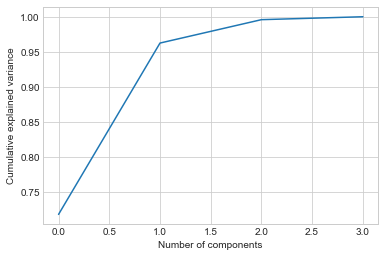

In [524]:
%matplotlib inline
plt.plot( np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show

In [525]:
pca=PCA(0.95) 
X_train_scal_pca = pca.fit_transform(X_train_scal)
X_test_scal_pca = pca.transform(X_test_scal)
pca.n_components_

2

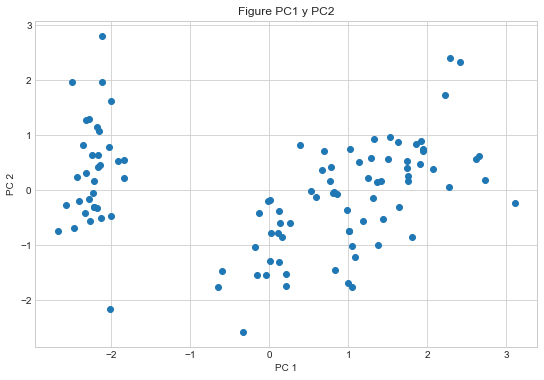

In [526]:
plt.figure(figsize=(9,6))
plt.scatter(X_train_scal_pca[:,0],X_train_scal_pca[:,1])    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Figure PC1 y PC2')
plt.show()

### KNN with PCA

In [527]:
model_knn = KNeighborsClassifier()

parameters = { 'n_neighbors' : list(range(1, 50)) }

knn_pca = GridSearchCV(model_knn, # modelo
                   param_grid = parameters, # Hyperparametros
                   refit = True, # retur best Parametrs 
                   scoring='accuracy',
                   cv = 5, # Count folds 
                   verbose=1) #Information about training 

knn_pca.fit( X_train_scal_pca, y_train ) 

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=1)

#### Best Score

In [528]:
print(f'KNN best score : {knn_pca.best_score_}')
performance_df = performance_df.append({'Model':'KNN_PCA','Best_score':knn_pca.best_score_},ignore_index=True)
performance_df.sort_values('Best_score',ascending=False)

KNN best score : 0.9428571428571428


,Model,Best_score
1,LR,0.971429
2,SVM,0.961905
3,DT,0.960909
0,KNN,0.952381
4,KNN_PCA,0.942857


### Logistic Regression with PCA


In [529]:
%%time
log_reg = LogisticRegression(random_state=4, solver='lbfgs')

parameters = [{'penalty':['l1','l2','elasticnet','none']}, 
              {'C':[1,2,3,4,5,6,7,8,9, 10,11,12,13,14, 100, 1000]}]

log_pca = GridSearchCV(estimator = log_reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

log_pca.fit(X_train_scal_pca, y_train)


CPU times: total: 750 ms
Wall time: 761 ms


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=4),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet', 'none']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                100, 1000]}],
             scoring='accuracy')


#### Best Score



In [530]:
print(f'Logistic Regression best score : {log.best_score_}')
performance_df = performance_df.append({'Model':'LR_PCA','Best_score':log_pca.best_score_},ignore_index=True)
performance_df.sort_values('Best_score',ascending=False)

Logistic Regression best score : 0.9714285714285715


,Model,Best_score
1,LR,0.971429
2,SVM,0.961905
3,DT,0.960909
0,KNN,0.952381
4,KNN_PCA,0.942857
5,LR_PCA,0.904762


### SVM with PCA


In [531]:
model_svc = svm.SVC()

In [532]:
model_svc = svm.SVC()

parameters = {'kernel':('linear', 'rbf'),
              'C':[1, 10, 100, 1000],
              'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}

svm_pca = GridSearchCV(model_svc, # modelo
                   param_grid = parameters, # Hyperparametros
                   refit = True, # retur best Parametrs 
                   cv = 5, # Count folds 
                   verbose=1) #Information about training 

svm_pca.fit( X_train_scal_pca, y_train )



Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             verbose=1)

#### best_score


In [533]:
print(f'SVM best score : {svm_pca.best_score_}')
performance_df = performance_df.append({'Model':'SVM_PCA','Best_score':svm_pca.best_score_},ignore_index=True)
performance_df.sort_values('Best_score',ascending=False)


SVM best score : 0.9238095238095237


,Model,Best_score
1,LR,0.971429
2,SVM,0.961905
3,DT,0.960909
0,KNN,0.952381
4,KNN_PCA,0.942857
6,SVM_PCA,0.92381
5,LR_PCA,0.904762


### Decision Trees Model with PCA

In [534]:
# #Define model
tree_clf = DecisionTreeClassifier()

tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

#Define GridserchCV
tree_pca = GridSearchCV(tree_clf,                    # model
                   param_grid = tree_para,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10,
                   refit = True)                     # number of folds

# Training Model
tree_pca.fit( X_train_scal_pca , y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='accuracy')

#### best_score

In [535]:
print(f'Decision Trees best score : {tree_pca.best_score_}')
performance_df = performance_df.append({'Model':'DT_PCA','Best_score':tree_pca.best_score_},ignore_index=True)
performance_df.sort_values('Best_score',ascending=False)

Decision Trees best score : 0.9227272727272726


,Model,Best_score
1,LR,0.971429
2,SVM,0.961905
3,DT,0.960909
0,KNN,0.952381
4,KNN_PCA,0.942857
6,SVM_PCA,0.92381
7,DT_PCA,0.922727
5,LR_PCA,0.904762


In [536]:
performance_df.sort_values('Best_score',ascending=False)

,Model,Best_score
1,LR,0.971429
2,SVM,0.961905
3,DT,0.960909
0,KNN,0.952381
4,KNN_PCA,0.942857
6,SVM_PCA,0.92381
7,DT_PCA,0.922727
5,LR_PCA,0.904762
